## OOP Boolean networks

2024-2025

Alan M H Beem

#### Boolean networks:
Finite state machines composed of N Boolean functions, each taking their next state from evaluation of the current states of their inputs.
  
&nbsp;&nbsp;&nbsp;&nbsp; Q = all possible Boolean state vectors, |Q| = 2^N  
  
&nbsp;&nbsp;&nbsp;&nbsp; Σ = step 
  
&nbsp;&nbsp;&nbsp;&nbsp; δ = Q x Σ -> Q  


Operation of these finite state machines reveals "attractors": cycles of states (cycles of length 1 are called "equilibrial states"). Kauffman 1969 shows that for a network of Boolean functions with 1 ≤ K ≤ 2, excluding tautology and contradiction, the number of observed cycles scales with N by a function similar to that which relates the number of genes to the number of cell types across species. The concept of Boolean networks is foundational to systems biology.

This file demonstrates functionality of and relating to BooleanNetwork class, including computation of transitions matrices, abstractly, counting the tuples of the relation: reference state cycle index → terminal state of perturbed run-in, for all cycle states, and for all observed states labeled by terminal cycle state, for unit perturbations as defined in Kauffman 1969 (flipping the state of one node), and for composite perturbations defined as two simultaneous non-equivalent unit perturbations.

Appendix explores various visualizations of Boolean network behavior.

In [1]:
# setup
from abn_mir_plotting_functions import *
from abn_mir_helper_functions import *
from bn_graph_methods import *
from sympy import *
init_printing(use_unicode=True)

net_selection = select_network(num_nodes=20,
                               minimum_max_cycle_length=12,
                               maximum_max_cycle_length=25,
                               minimum_number_of_cycles=25,
                               maximum_number_of_cycles=35,
                               maximum_number_of_networks=2000,
                               iterations_limit=400)
bn = net_selection[0]
print(f"Calculated {len(net_selection[1])} networks.\nSelected network:\n{bn}")
bn.add_cycles(1000)

print(f"Selected network after additional run-ins:\n{bn}")

Calculated 992 networks.
Selected network:
BooleanNetwork: N=20. avg_k= 1.6. Run-ins: 202. Observed cycles: 27. t_records: 202. u_records: 0
Cycle lengths: [12, 12, 12, 12, 12, 12, 12, 12, 12, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 3, 3]
Selected network after additional run-ins:
BooleanNetwork: N=20. avg_k= 1.6. Run-ins: 1202. Observed cycles: 28. t_records: 1202. u_records: 0
Cycle lengths: [12, 12, 12, 12, 12, 12, 12, 12, 12, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 3, 3, 6]


##### Truth table of a Boolean function:

In [2]:
see_node = SystemRandom().choice(bn.nodes)
print(f"Expression: {see_node.function.get_expression_string()}\n")
print(f"Boolean function truth table: \n\n{get_truth_table(see_node.get_boolean)}")

Expression: a

Boolean function truth table: 

a	b	output

1	1	1

1	0	1

0	1	0

0	0	0



#### Graphical representation of selected network

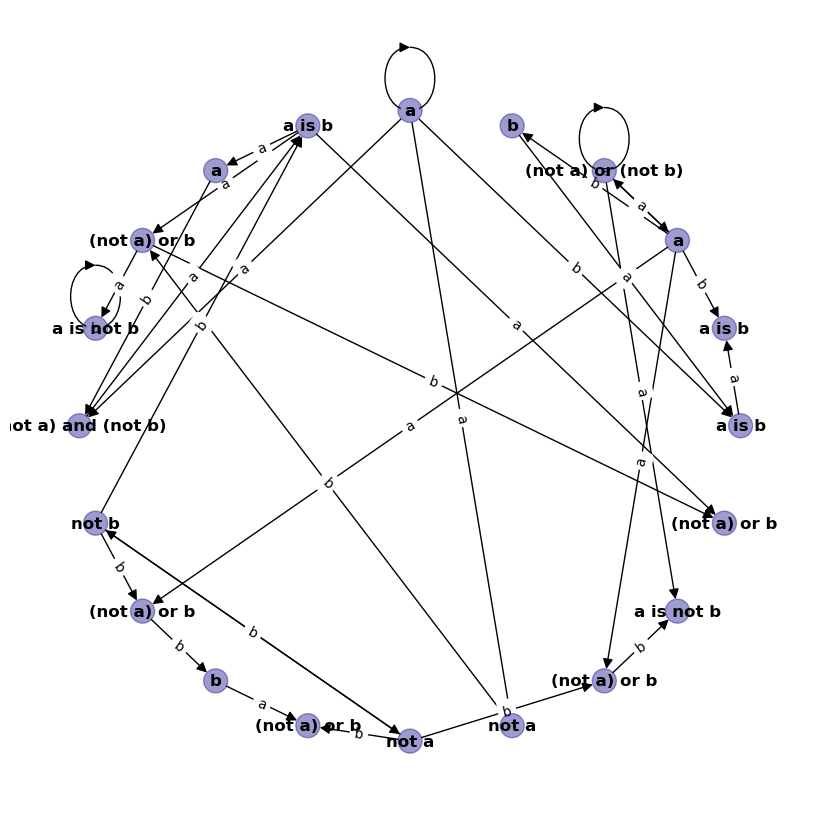

In [3]:
fig = get_graph_representation(bn)
plt.show()

##### Text output of Boolean function node states over 1 cycle:

In [4]:
figure_1_1(bn, index=0)
print()
# figure_1_1(bn, index=1)
# print()
# figure_1_1(bn, index=2)
# print()

0th cycle

   node 1:   1     1     0     1     1     0     1     1     0     1     1     0  |  1   
   node 2:   1     1     0     1     1     0     1     1     0     1     1     0  |  1   
   node 3:   0     1     1     0     1     1     0     1     1     0     1     1  |  0   
   node 4:   0     0     1     0     0     1     0     0     1     0     0     1  |  0   
   node 5:   0     0     1     1     0     0     1     1     0     0     1     1  |  0   
   node 6:   1     0     1     0     1     0     1     0     1     0     1     0  |  1   
   node 7:   0     1     1     0     0     1     1     0     0     1     1     0  |  0   
   node 8:   0     0     0     0     0     0     0     0     0     0     0     0  |  0   
   node 9:   1     0     1     1     0     1     1     0     1     1     0     1  |  1   
  node 10:   1     1     1     0     1     0     1     1     1     0     1     0  |  1   
  node 11:   1     1     1     0     1     1     1     1     1     0     1     1  |  1   

##### Transitions matrix:

Unit perturbation: flipping the state of 1 node

Computation of transitions matrix:
> For each state of each observed cycle:
> > For each node:
> > > node state <- not node state // perturbed state
> > > 
> > > Compute run-in from perturbed state
> > > 
> > > Tabulate in matrix[starting cycle index][ending cycle index]
> > > 
> > > 
Output: matrix of tabulated values, heatmaps (row-normalized, values as in matrix)

##### The transitions are computed as such for all cycle states, and for all run-in states labeled by terminal state cycle
Cycles are sorted by "Hamming diameter", the maximum intra-cycle Hamming distance (this is inspired by a physics lab wherein we estimated the diameter of human hair using a laser). O(f(n)) for f(n) >= (n*(n - 1)/2), where n::= number of cycle states

In [5]:
bn.compute_unit_perturbations_matrix(4, True) # Used to read: True for small N, with bytearrays, it seems to be faster
# Hamming diameter sort: 4

Observed transitions over unit perturbations:
(last row and last column represent states with cycle index of None)



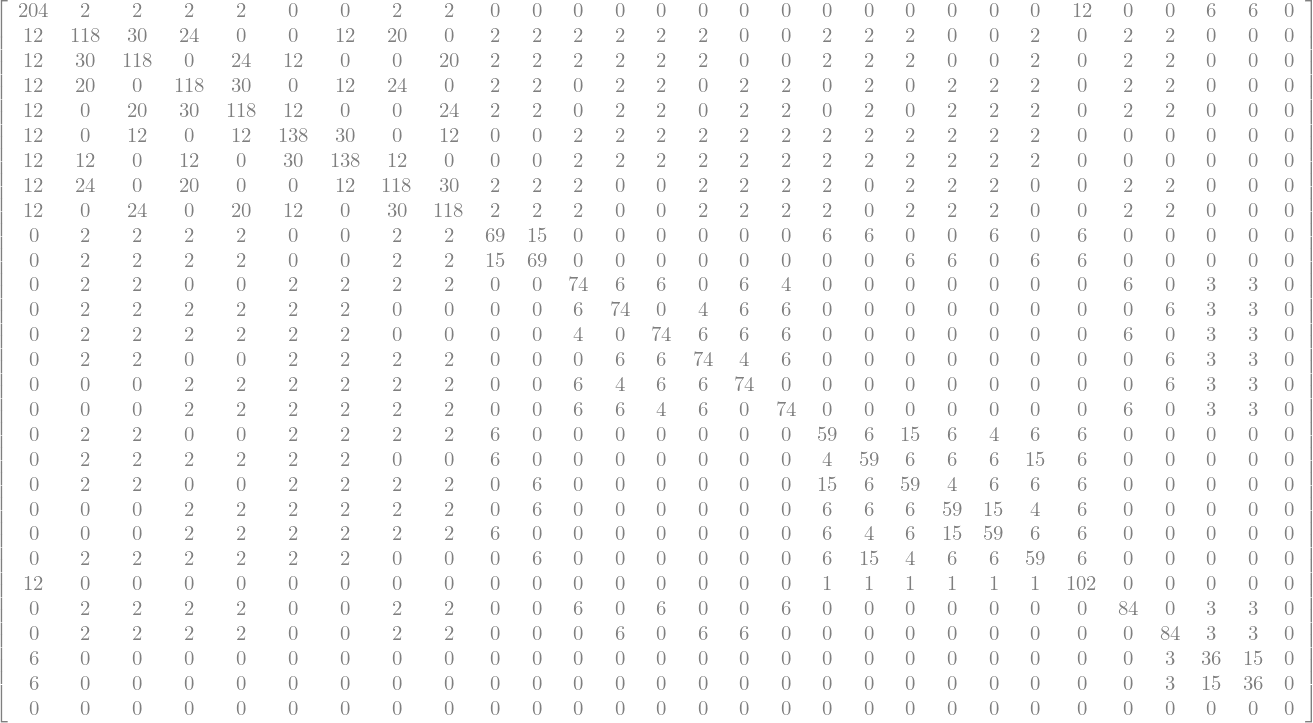

In [6]:
print('Observed transitions over unit perturbations:\n(last row and last column represent states with cycle index of None)\n')
Matrix(bn.cycles_unit_perturbations_transition_matrix)

Observed transitions over all run-in states labeled by terminal state cycle:
(last row and last column represent states with cycle index of None)



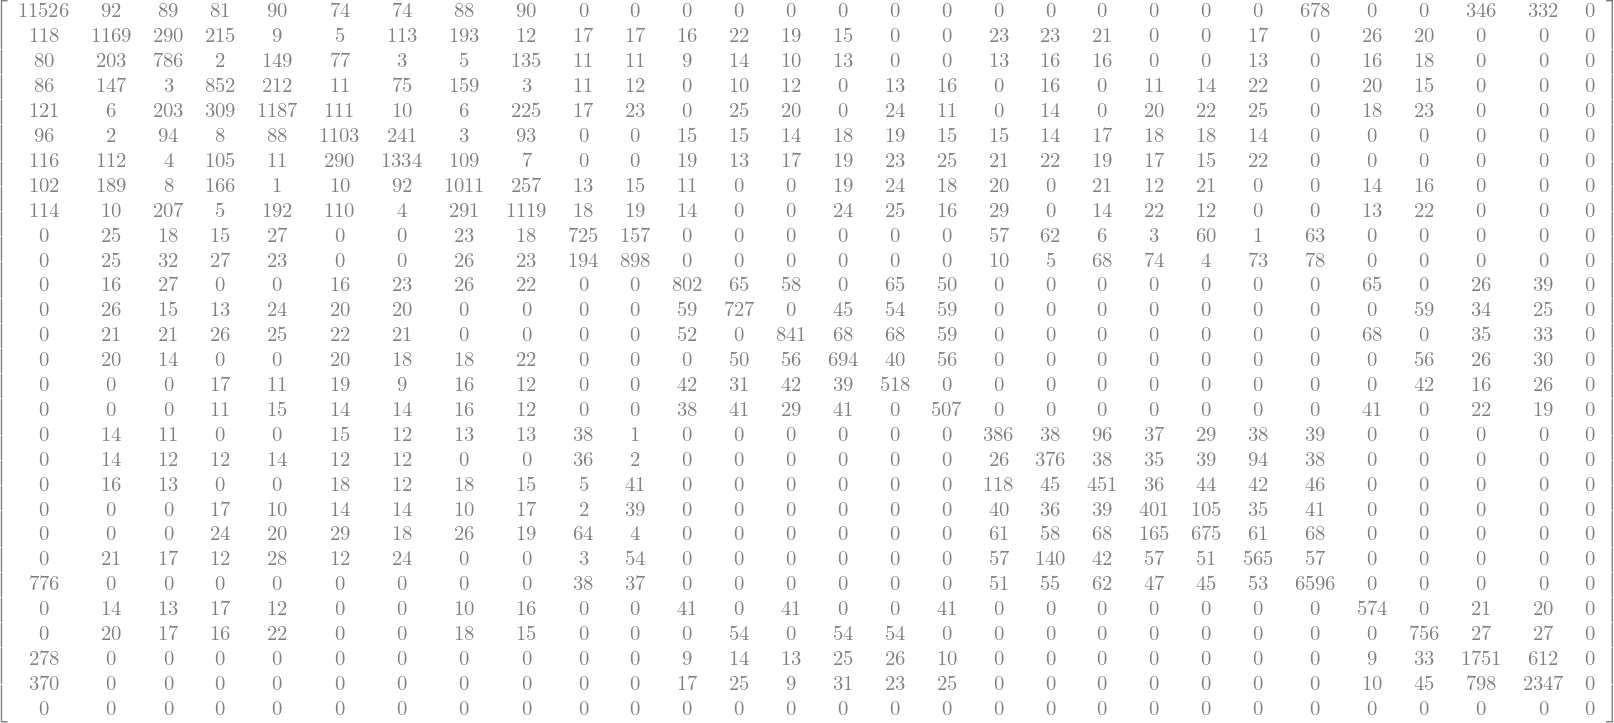

In [7]:
print('Observed transitions over all run-in states labeled by terminal state cycle:\n(last row and last column represent states with cycle index of None)\n')
Matrix(bn.total_unit_perturbations_transition_matrix)

#### Cycle transitions as a graph

/var/folders/xk/tyv38sr17x77hmcdnnq8vrrc0000gn/T/ipykernel_85451/300333453.py:2: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  n_color = cm.get_cmap('gist_rainbow_r')


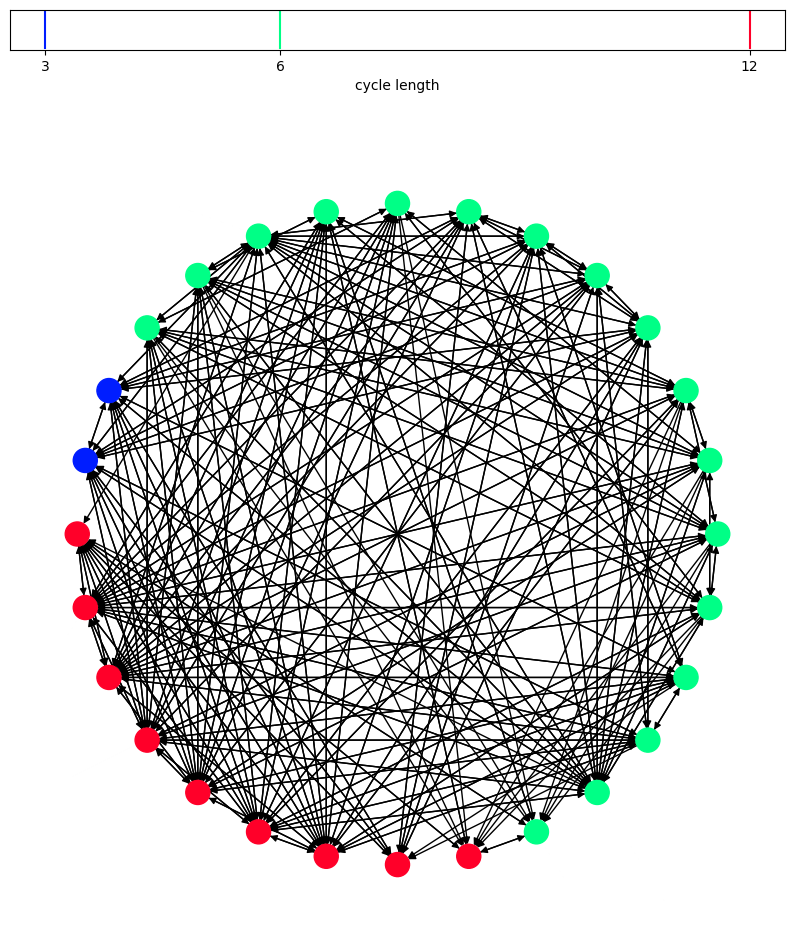

In [51]:
from matplotlib import cm
n_color = cm.get_cmap('gist_rainbow_r')
G = nx.DiGraph()
for i in range(len(bn.cycles_unit_perturbations_transition_matrix) - 1):
    for j in range(len(bn.cycles_unit_perturbations_transition_matrix[0]) - 1):
        entry = bn.cycles_unit_perturbations_transition_matrix[i][j]
        if entry > 0 and i != j:  # ignoring self-self cycle transitions
            G.add_edge(i, j, weight=((entry**-1) if entry != 0 else 0))
# nx.draw(G, pos=nx.kamada_kawai_layout(G))
# nx.draw(G, pos=nx.spring_layout(G))
n_colors = []
for i in range(len(G.nodes)):
    n_colors.append(n_color(len(bn.bn_collapsed_cycles.cycle_records[i]) / bn.longest_cycle_length()))
fig, axs = plt.subplots(2, 1, height_ratios=[1,20])
axs[0].set_xlabel('cycle length')
cycle_lengths = set(len(bn.bn_collapsed_cycles.cycle_records[i]) for i in range(len(bn.bn_collapsed_cycles)))
cycle_lengths = sorted(list(cycle_lengths))
axs[0].set_xticks(cycle_lengths)
axs[0].set_xticklabels([str(L) for L in cycle_lengths])
axs[0].set_yticks([])
for L in cycle_lengths:
    axs[0].plot([L, L], [0, 1], color=n_color(L / bn.longest_cycle_length()))
# axs[1] = nx.draw(G, pos=nx.spectral_layout(G), node_color=n_colors)
# axs[1] = nx.draw(G, pos=nx.kamada_kawai_layout(G), node_color=n_colors)
axs[1] = nx.draw(G, pos=nx.shell_layout(G), node_color=n_colors)
fig.set_size_inches(10, 12)

last row and last column represent run-ins that start / end in state with a cycle index of None 
(in rightmost column, entries indicate run-ins that were as long as iteration_limit, though they may have ended on a previously unobserved cycle)


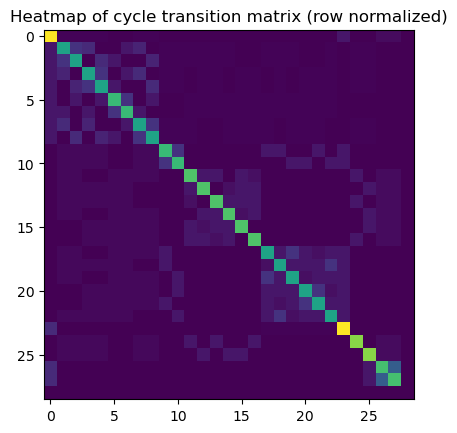

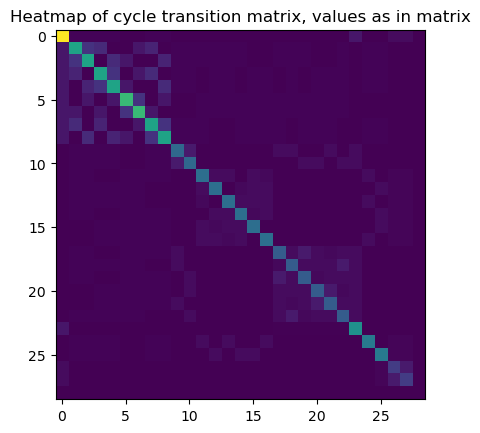

In [8]:
print("last row and last column represent run-ins that start / end in state with a cycle index of None \n(in rightmost column, entries indicate run-ins that were as long as iteration_limit, though they may have ended on a previously unobserved cycle)")

row_sums_list = [sum(row) for row in bn.cycles_unit_perturbations_transition_matrix]
plt.figure()
plt.imshow([[bn.cycles_unit_perturbations_transition_matrix[j][k] / (1 if row_sums_list[j] == 0 else row_sums_list[j]) for k in range(len(bn.cycles_unit_perturbations_transition_matrix))]
             for j in range(len(bn.cycles_unit_perturbations_transition_matrix))])
plt.title("Heatmap of cycle transition matrix (row normalized)")
plt.show()

plt.figure()
plt.title("Heatmap of cycle transition matrix, values as in matrix")  # confusing wording: "Transition matrix, values as in BooleanNetwork field"
plt.imshow(bn.cycles_unit_perturbations_transition_matrix)
plt.show()

#### Cycle transitions normalized by /= cycle length i x cycle length j

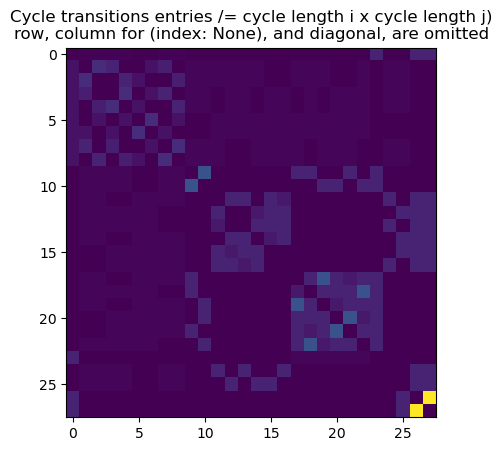

In [9]:
matrix = copy.deepcopy(bn.cycles_unit_perturbations_transition_matrix)
plt.figure()
plt.imshow([[  # normalize by product: cycle length i x cycle length j
    matrix[j][k] / 
    (len(bn.bn_collapsed_cycles.cycle_records[j])
      * len(bn.bn_collapsed_cycles.cycle_records[k]))
      if j != k else 0
    for k in range(len(matrix) - 1)]
             for j in range(len(matrix) - 1)])
plt.title("Cycle transitions entries /= cycle length i x cycle length j)\nrow, column for (index: None), and diagonal, are omitted")
plt.show()

# plt.figure()
# # matrix = [[matrix[j][k] / (len(bn.bn_collapsed_cycles.cycle_records[j]) * len(bn.bn_collapsed_cycles.cycle_records[k])*(1/2)) for k in range(len(matrix) - 1)] for j in range(len(matrix) - 1)]
# # matrix = [[0 if j == k else matrix[j][k] / (len(bn.bn_collapsed_cycles.cycle_records[j])**2 + len(bn.bn_collapsed_cycles.cycle_records[k])**2)*(1/2) for k in range(len(matrix) - 1)] for j in range(len(matrix) - 1)]
# matrix = [[0 if j == k else matrix[j][k] / (len(bn.bn_collapsed_cycles.cycle_records[j]) * len(bn.bn_collapsed_cycles.cycle_records[k])) for k in range(len(matrix) - 1)] for j in range(len(matrix) - 1)]
# plt.imshow([[matrix[j][k] / (1 if sum(matrix[j]) == 0 else sum(matrix[j])) for k in range(len(matrix[j]))] for j in range(len(matrix))])
# plt.title("Cycle transitions entries /= cycle length i x cycle length j)\nrow, column for (index: None), and diagonal, are omitted\nrow normalized")
# plt.show()

# another approach: divide entries of each row by ith cycle length, divide entries of each column by jth cycle length (mathematically equivalent to above)

last row and last column represent run-ins that start / end in state with a cycle index of None 
(in rightmost column, entries indicate run-ins that were as long as iteration_limit, though they may have ended on a previously unobserved cycle)


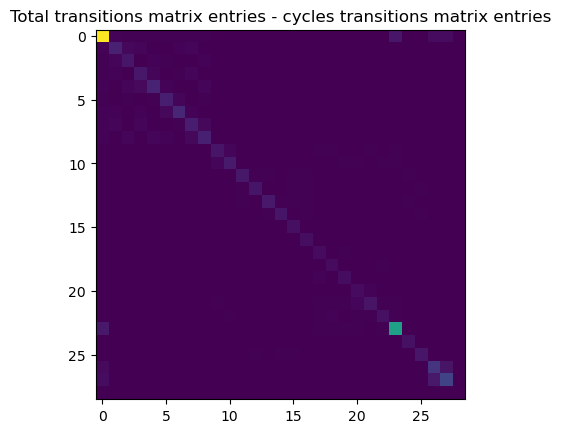

In [25]:
# total - cycles
diff_t_m_1 = []
for i in range(len(bn.total_unit_perturbations_transition_matrix)):
    diff_t_m_1.append([])
    for j in range(len(bn.total_unit_perturbations_transition_matrix[0])):
        diff_t_m_1[i].append(bn.total_unit_perturbations_transition_matrix[i][j] - bn.cycles_unit_perturbations_transition_matrix[i][j])
print("last row and last column represent run-ins that start / end in state with a cycle index of None \n(in rightmost column, entries indicate run-ins that were as long as iteration_limit, though they may have ended on a previously unobserved cycle)")

plt.figure()
plt.imshow(diff_t_m_1)
plt.title("Total transitions matrix entries - cycles transitions matrix entries")
plt.show()
# plt.figure()
# plt.imshow([[d / (row_sum if (row_sum:=sum(row)) != 0 else 1) for d in row] for row in diff_t_m_1])
# plt.title("Total transitions matrix entries - cycles transitions matrix entries\nrow normalized")
# plt.show()

#### Composite perturbation transitions matrix

$composite$ $perturbation$ $=$ $\{unit$ $perturbations\}$ <sup> 2 </sup>

In [11]:
bn.compute_composite_perturbations_matrix(sort_selection=1, composite_perturbations= list(CompositePerturbation([i, j]) for i in range(len(bn)) for j in range(len(bn)) if i != j), compute_over_u_t_records_if_true=False)\
# a runtime: 18.5s (but these times vary)

Observed transitions over composite unit perturbations:
(last row and last column represent states with cycle index of None)



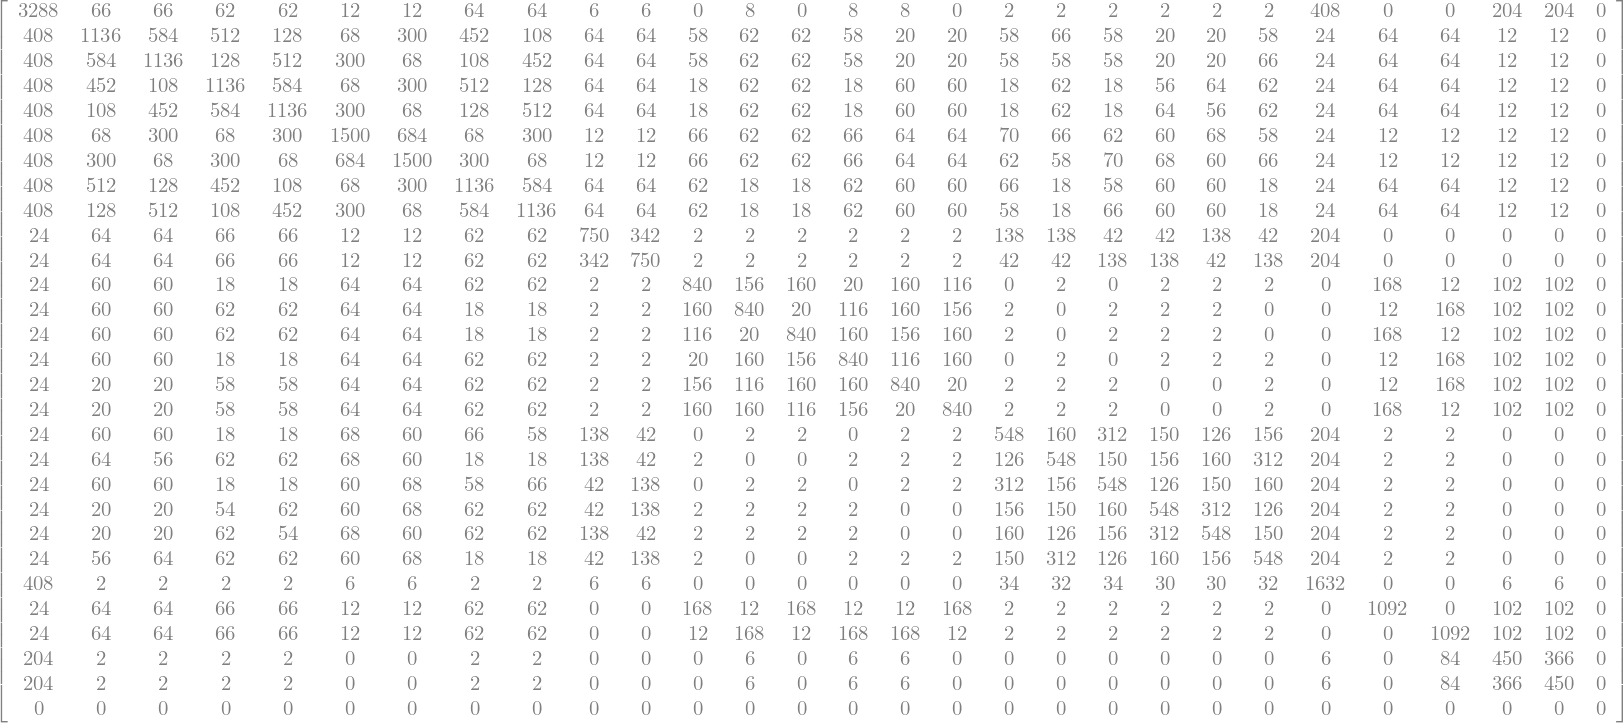

In [12]:
print('Observed transitions over composite unit perturbations:\n(last row and last column represent states with cycle index of None)\n')
Matrix(bn.cycles_composite_perturbations_matrix)

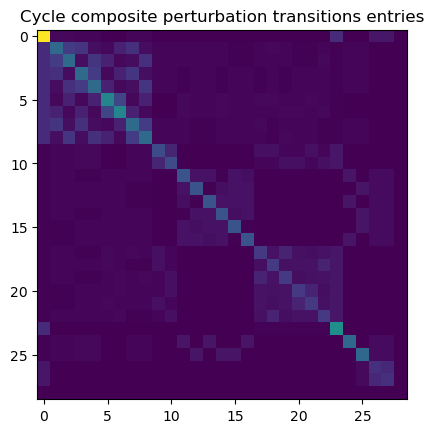

In [13]:
plt.figure()
plt.imshow(bn.cycles_composite_perturbations_matrix)
plt.title("Cycle composite perturbation transitions entries")
plt.show()  # other normalizations are interesting, but I'm not sure what I'm really looking for, there

#### Unittest:

In [50]:
# !python3 testing__boolean_networks.py
!coverage run -m unittest discover
!coverage report -m
!coverage html  # still some work to be done regarding coverage, but, there it is

..................
----------------------------------------------------------------------
Ran 18 tests in 9.086s

OK
Name                            Stmts   Miss  Cover   Missing
-------------------------------------------------------------
bn_mir_helper_functions_V1.py     282    238    16%   20-34, 41-51, 55-60, 65, 93, 97-116, 121-127, 130, 136-144, 151-158, 163, 169-176, 180-187, 191-200, 204-220, 224-238, 246, 249-253, 259-265, 268-269, 274-276, 282-303, 307-310, 317-350, 354-357, 361, 365, 369, 374-379, 384, 390-423, 427, 431-436
boolean_networks.py               874    287    67%   299, 303, 307, 311, 322-325, 329, 333, 336, 346-348, 352, 356, 359, 369-387, 390, 393, 397, 400, 441, 479, 482, 499, 565-566, 569-570, 573-578, 581, 591-599, 602-610, 613-618, 628, 674-681, 685-695, 700, 703-706, 712-716, 770, 776, 786-791, 794-802, 808, 835-836, 839-842, 876-877, 972-996, 1042-1054, 1063-1066, 1069, 1072-1073, 1079-1081, 1116, 1118-1120, 1122, 1220-1224, 1238, 1303-1424, 1432-1441, 1